In [ ]:
import pandas as pd
import numpy as np
import pysindy as ps


df = pd.read_csv('Data_for_SINDyC.csv')



time_values = df.iloc[:, 0].values
U_r_values = df.iloc[:, 1].values.reshape(-1, 1)
q_values = df.iloc[:, 2].values.reshape(-1, 1)
u_values = df.iloc[:, 3].values.reshape(-1, 1)


X_train = np.hstack([q_values, u_values, U_r_values])


dt = 0.3


feature_names = ['q', 'u', 'U_r']


differentiation_method = ps.FiniteDifference(order=2)


optimizer = ps.STLSQ(threshold=0.00)


polynomial_library = ps.PolynomialLibrary(degree=3) #+ ps.FourierLibrary(n_frequencies=2)


model = ps.SINDy(feature_names=feature_names, optimizer=optimizer,
                 differentiation_method=differentiation_method,
                 feature_library=polynomial_library)


#model.fit(X_train, t=dt, u = U_r_values)
model.fit(X_train, t = dt)

model.print()


(q)' = -0.011 1 + -0.206 q + 1.025 u + 0.008 U_r + 0.082 q U_r + -0.013 u U_r + -0.002 U_r^2 + 0.002 q^3 + 0.007 q^2 u + -0.009 q u^2 + -0.008 q U_r^2 + 0.001 u U_r^2
(u)' = -0.024 1 + 2.845 q + -4.848 u + 0.016 U_r + -1.223 q U_r + 2.059 u U_r + -0.003 U_r^2 + 0.010 q^3 + -0.162 q^2 u + -0.060 q u^2 + 0.090 q U_r^2 + 0.026 u^3 + -0.209 u U_r^2
(U_r)' = 0.001 1


In [ ]:
U_r_values.shape
q_values.shape
u_values.shape

(2000000, 1)

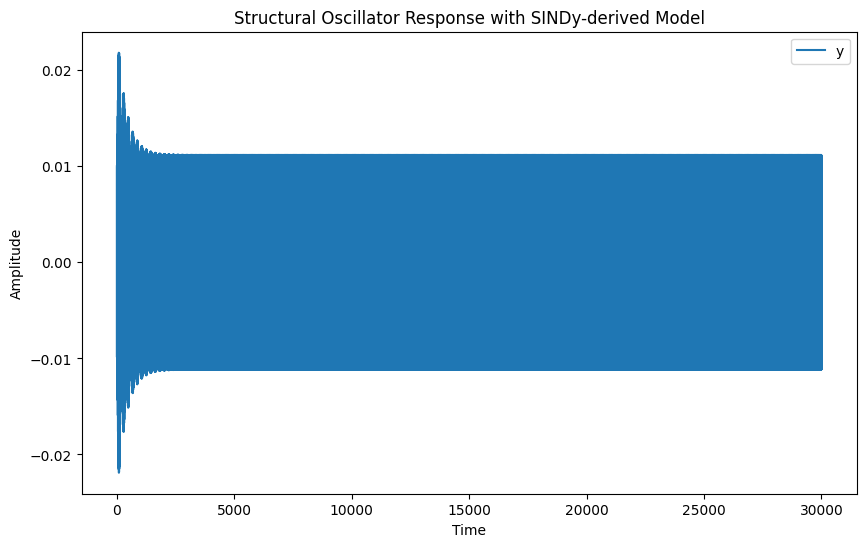

"\n(q)' = 1.447 sin(1 u) + -0.193 sin(2 u)\n(u)' = -2.632 sin(1 q) + 2.165 sin(1 u) + 1.539 sin(2 q) + -1.686 sin(2 u) + -0.673 sin(3 q) + 0.132 sin(3 u)\n\n\n"

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants
epsilon = 0.05
St = 0.1932
A = 4
gamma = 0.8
alpha = 0
Cl_knot = 0.3842
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)
U_r = 4.7


def structural_ode(state, t, M, St, U_r, zeta, gamma, mu, alpha):
    y, v, q, u = state


    dy_dt = v
    dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3


    #dq_dt = 0.977*u # (q)' = 1.052 u
    #du_dt = A * dv_dt - epsilon * St * U_r * (q**2 - 1) * u - St**2 * U_r**2 * q
    #du_dt = A*dv_dt -0.935*q**2*u + + 0.145*u + -0.902*q - 0.170*q*u**2 + 0.137*u**3
    # -0.902 q + 0.145 u + -0.935 q^2 u + -0.170 q u^2 + 0.137 u^3
    #du_dt = A*dv_dt + -1.042*q + -0.112*q**2*u

    #dq_dt = 1.447*np.sin(1*u) + -0.193*np.sin(2*u)
    #du_dt = A* dv_dt -2.632*np.sin(1*q) + 2.165*np.sin(1*u) + 1.539*np.sin(2*q) + -1.686*np.sin(2*u) + -0.673*np.sin(3*q) + 0.132*np.sin(3*u)


    dq_dt = (-0.011 + -0.206 * q + 1.025 * u + 0.008 * U_r +
            0.082 * q * U_r + -0.013 * u * U_r + -0.002 * U_r**2 +
            0.002 * q**3 + 0.007 * q**2 * u + -0.009 * q * u**2 +
            -0.008 * q * U_r**2 + 0.001 * u * U_r**2)

    du_dt = A*dv_dt + (-0.024 + 2.845 * q + -4.848 * u + 0.016 * U_r +
            -1.223 * q * U_r + 2.059 * u * U_r + -0.003 * U_r**2 +
            0.010 * q**3 + -0.162 * q**2 * u + -0.060 * q * u**2 +
            0.090 * q * U_r**2 + 0.026 * u**3 + -0.209 * u * U_r**2)








    return [dy_dt, dv_dt, dq_dt, du_dt]



initial_state = [0, 0.01, 0, 0.0]


t_points = np.linspace(0, 30000, 100000)


solution = odeint(structural_ode, initial_state, t_points, args=(M, St, U_r, zeta, gamma, mu, alpha))


y_t = solution[:, 0]
y_dot_t = solution[:, 1]


plt.figure(figsize=(10, 6))
plt.plot(t_points, y_dot_t, label='y')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Structural Oscillator Response with SINDy-derived Model')
plt.show()


'''
(q)' = 1.447 sin(1 u) + -0.193 sin(2 u)
(u)' = -2.632 sin(1 q) + 2.165 sin(1 u) + 1.539 sin(2 q) + -1.686 sin(2 u) + -0.673 sin(3 q) + 0.132 sin(3 u)


'''







<ipython-input-1-af15742b85c9>:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


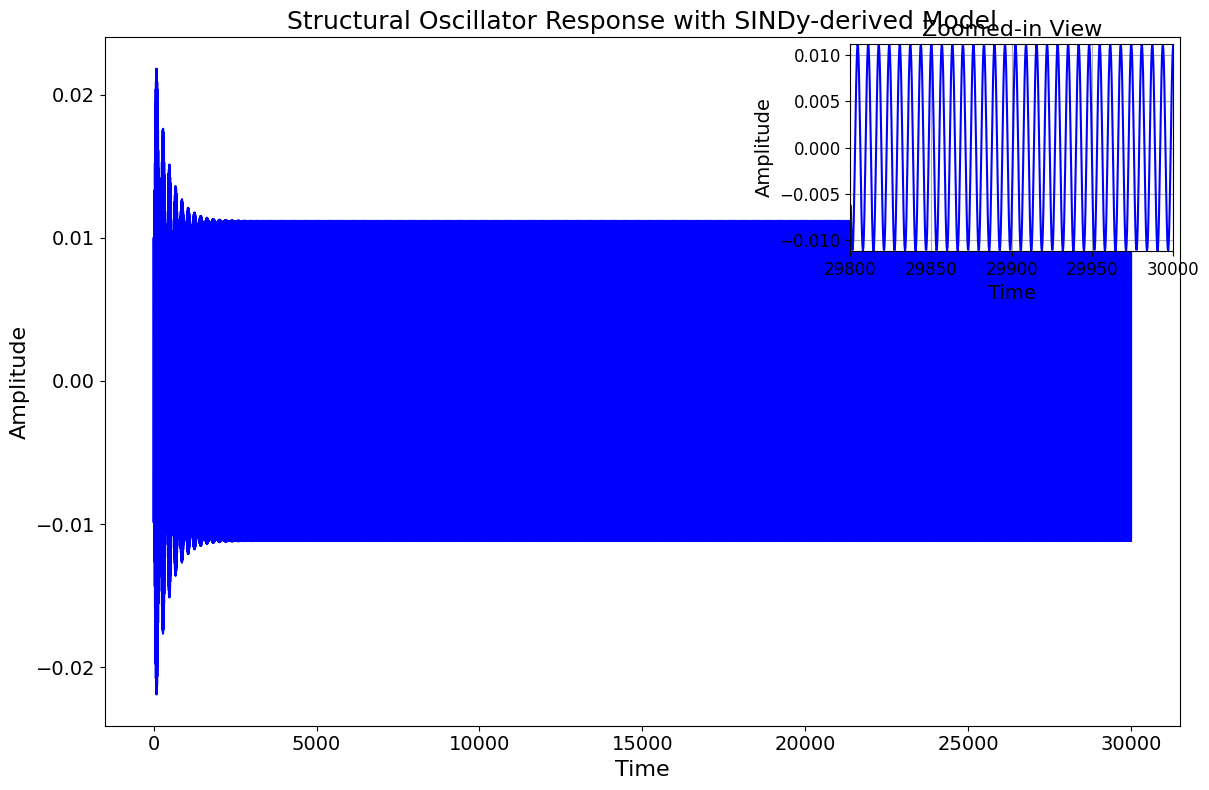

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Constants
epsilon = 0.05
St = 0.1932
A = 4
gamma = 0.8
alpha = 0
Cl_knot = 0.3842
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)
U_r = 4.7

# Define the ODE system
def structural_ode(state, t, M, St, U_r, zeta, gamma, mu, alpha):
    y, v, q, u = state
    dy_dt = v
    dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3
    dq_dt = (-0.011 - 0.206 * q + 1.025 * u + 0.008 * U_r +
             0.082 * q * U_r - 0.013 * u * U_r - 0.002 * U_r**2 +
             0.002 * q**3 + 0.007 * q**2 * u - 0.009 * q * u**2 +
             -0.008 * q * U_r**2 + 0.001 * u * U_r**2)
    du_dt = A * dv_dt + (-0.024 + 2.845 * q - 4.848 * u + 0.016 * U_r +
             -1.223 * q * U_r + 2.059 * u * U_r - 0.003 * U_r**2 +
             0.010 * q**3 - 0.162 * q**2 * u - 0.060 * q * u**2 +
             0.090 * q * U_r**2 + 0.026 * u**3 - 0.209 * u * U_r**2)
    return [dy_dt, dv_dt, dq_dt, du_dt]

# Initial conditions
initial_state = [0, 0.01, 0, 0.0]

# Time points
t_points = np.linspace(0, 30000, 100000)

# Solve ODE
solution = odeint(structural_ode, initial_state, t_points, args=(M, St, U_r, zeta, gamma, mu, alpha))

# Extract results
y_t = solution[:, 0]
y_dot_t = solution[:, 1]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the full range
ax.plot(t_points, y_dot_t, label='y', color='blue')
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
ax.set_title('Structural Oscillator Response with SINDy-derived Model', fontsize=18)

# Inset zoomed plot
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')
zoom_range = (29800, 30000)
zoom_mask = (t_points >= zoom_range[0]) & (t_points <= zoom_range[1])
ax_inset.plot(t_points[zoom_mask], y_dot_t[zoom_mask], color='blue')
ax_inset.set_xlim(zoom_range)
ax_inset.set_ylim(min(y_dot_t[zoom_mask]), max(y_dot_t[zoom_mask]))
ax_inset.set_xlabel('Time', fontsize=14)
ax_inset.set_ylabel('Amplitude', fontsize=14)
ax_inset.set_title('Zoomed-in View', fontsize=16)

# Customize tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)
ax_inset.tick_params(axis='both', which='major', labelsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-4-7d2a9e421918>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


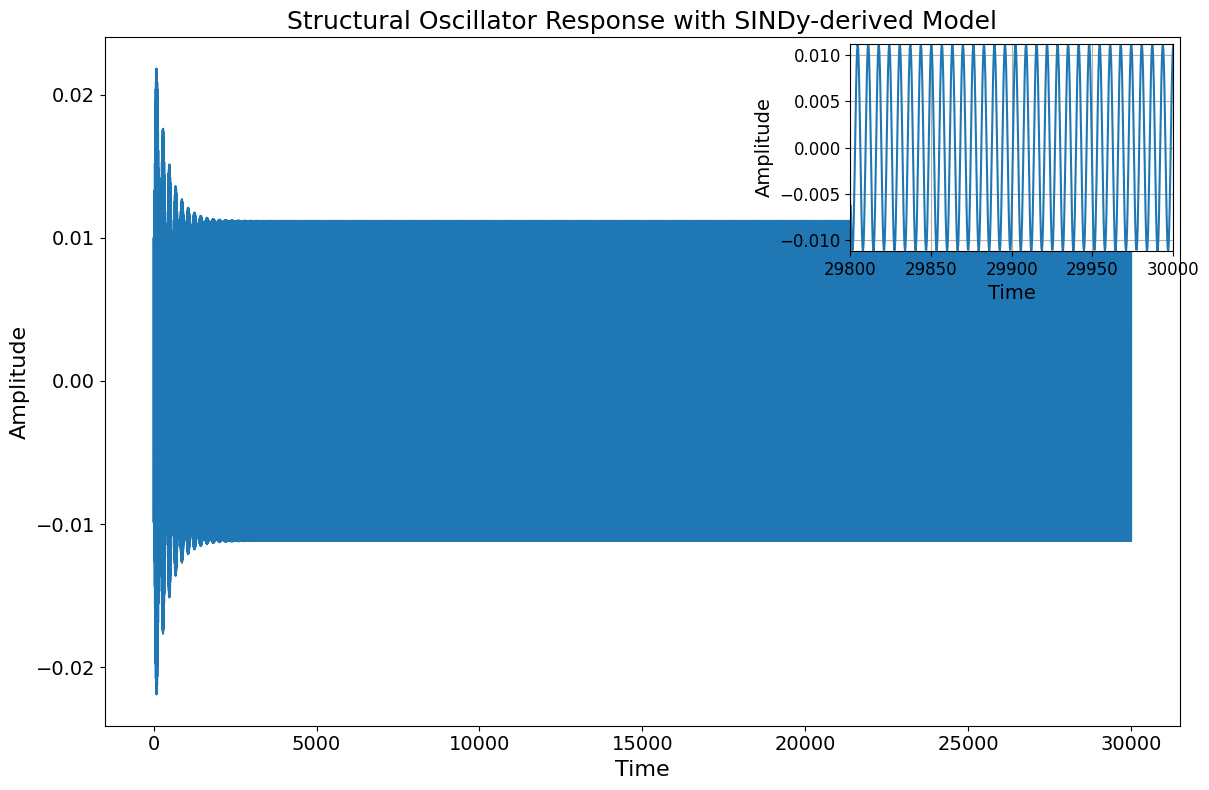

In [ ]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the full range
ax.plot(t_points, y_dot_t, label='y', )
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
ax.set_title('Structural Oscillator Response with SINDy-derived Model', fontsize=18)

# Inset zoomed plot
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')
zoom_range = (29800, 30000)
zoom_mask = (t_points >= zoom_range[0]) & (t_points <= zoom_range[1])
ax_inset.plot(t_points[zoom_mask], y_dot_t[zoom_mask])
ax_inset.set_xlim(zoom_range)
ax_inset.set_ylim(min(y_dot_t[zoom_mask]), max(y_dot_t[zoom_mask]))
ax_inset.set_xlabel('Time', fontsize=14)
ax_inset.set_ylabel('Amplitude', fontsize=14)


# Customize tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)
ax_inset.tick_params(axis='both', which='major', labelsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

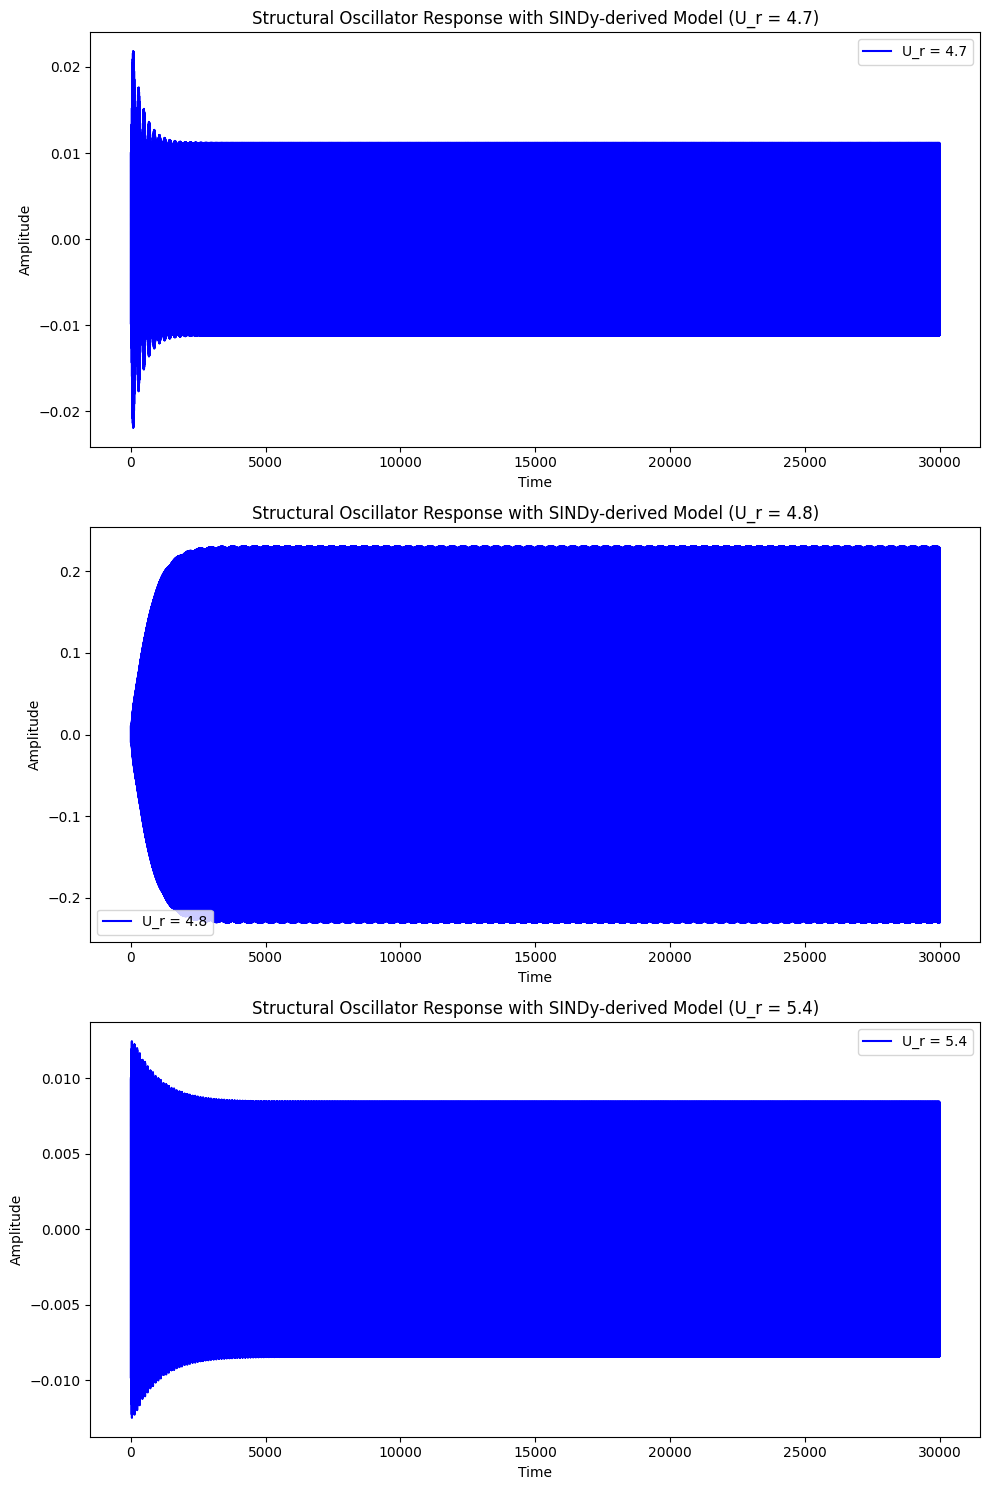

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants
epsilon = 0.05
St = 0.1932
A = 4
gamma = 0.8
alpha = 0
Cl_knot = 0.3842
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)


def structural_ode(state, t, M, St, U_r, zeta, gamma, mu, alpha):
    y, v, q, u = state

    dy_dt = v
    dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3

    dq_dt = (-0.011 + -0.206 * q + 1.025 * u + 0.008 * U_r +
            0.082 * q * U_r + -0.013 * u * U_r + -0.002 * U_r**2 +
            0.002 * q**3 + 0.007 * q**2 * u + -0.009 * q * u**2 +
            -0.008 * q * U_r**2 + 0.001 * u * U_r**2)

    du_dt = A * dv_dt + (-0.024 + 2.845 * q + -4.848 * u + 0.016 * U_r +
            -1.223 * q * U_r + 2.059 * u * U_r + -0.003 * U_r**2 +
            0.010 * q**3 + -0.162 * q**2 * u + -0.060 * q * u**2 +
            0.090 * q * U_r**2 + 0.026 * u**3 + -0.209 * u * U_r**2)

    return [dy_dt, dv_dt, dq_dt, du_dt]


initial_state = [0, 0.01, 0, 0.0]
t_points = np.linspace(0, 30000, 100000)


U_r_values = [4.7, 4.8, 5.4]


plt.figure(figsize=(10, 15))


for i, U_r in enumerate(U_r_values):
    solution = odeint(structural_ode, initial_state, t_points, args=(M, St, U_r, zeta, gamma, mu, alpha))
    y_dot_t = solution[:, 1]

    plt.subplot(3, 1, i+1)
    plt.plot(t_points, y_dot_t, label=f'U_r = {U_r}', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title(f'Structural Oscillator Response with SINDy-derived Model (U_r = {U_r})')


plt.tight_layout()


plt.savefig('structural_oscillator_response_separate_plots.png', dpi=300)
plt.show()


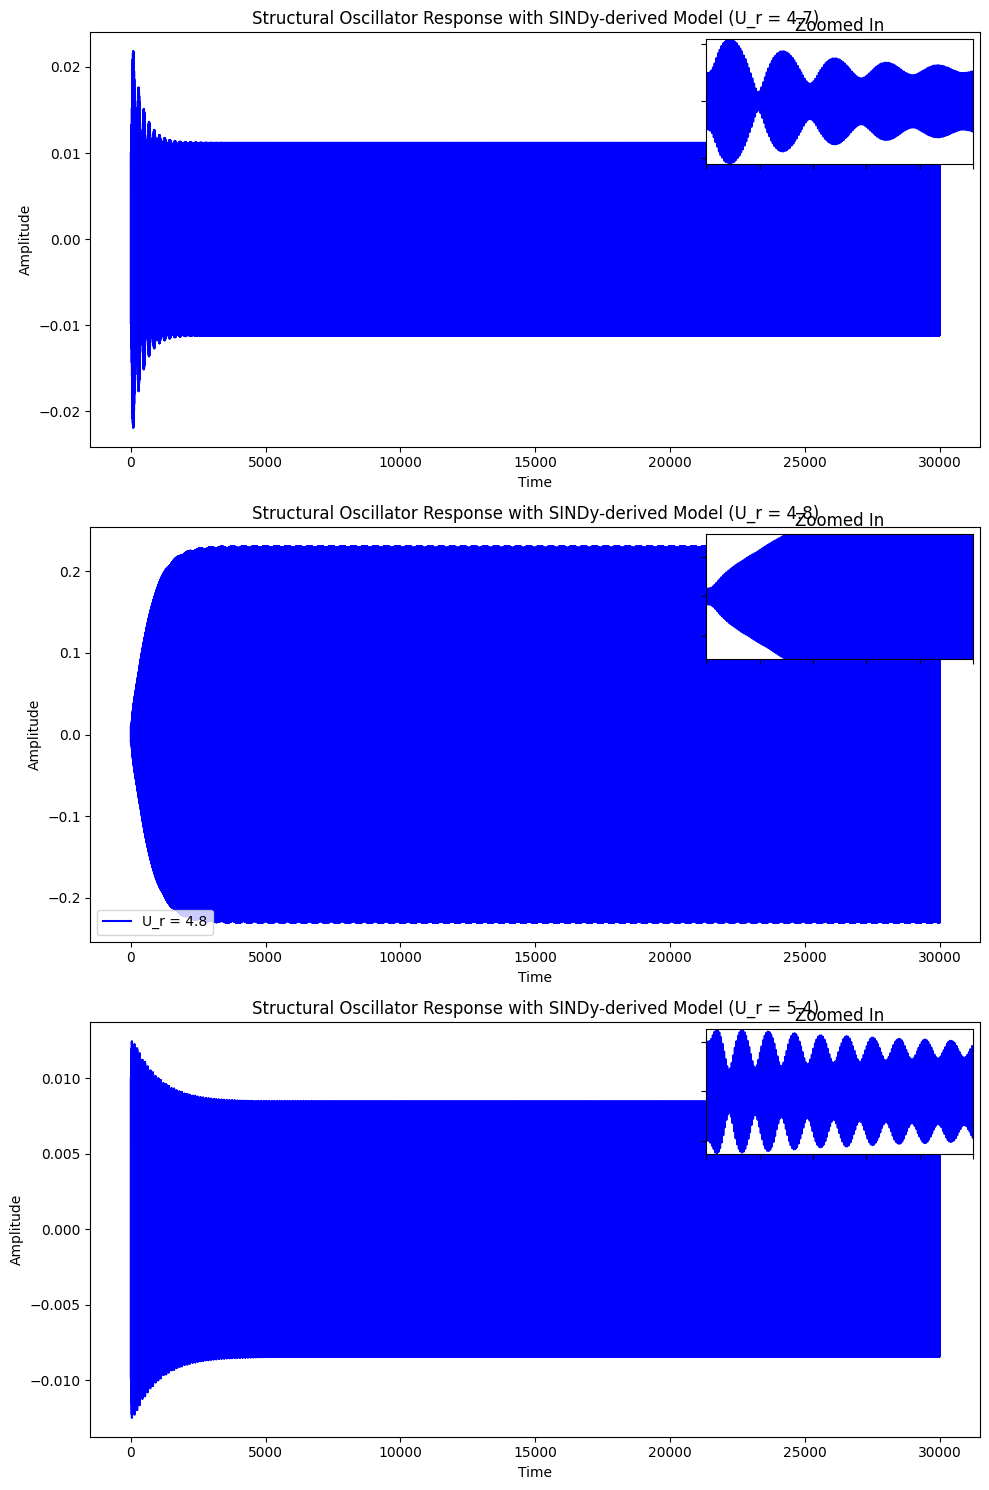

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Constants
epsilon = 0.05
St = 0.1932
A = 4
gamma = 0.8
alpha = 0
Cl_knot = 0.3842
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)

def structural_ode(state, t, M, St, U_r, zeta, gamma, mu, alpha):
    y, v, q, u = state

    dy_dt = v
    dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3

    dq_dt = (-0.011 + -0.206 * q + 1.025 * u + 0.008 * U_r +
            0.082 * q * U_r + -0.013 * u * U_r + -0.002 * U_r**2 +
            0.002 * q**3 + 0.007 * q**2 * u + -0.009 * q * u**2 +
            -0.008 * q * U_r**2 + 0.001 * u * U_r**2)

    du_dt = A * dv_dt + (-0.024 + 2.845 * q + -4.848 * u + 0.016 * U_r +
            -1.223 * q * U_r + 2.059 * u * U_r + -0.003 * U_r**2 +
            0.010 * q**3 + -0.162 * q**2 * u + -0.060 * q * u**2 +
            0.090 * q * U_r**2 + 0.026 * u * u * u + -0.209 * u * U_r**2)

    return [dy_dt, dv_dt, dq_dt, du_dt]


initial_state = [0, 0.01, 0, 0.0]
t_points = np.linspace(0, 30000, 100000)


U_r_values = [4.7, 4.8, 5.4]


plt.figure(figsize=(10, 15))


for i, U_r in enumerate(U_r_values):
    solution = odeint(structural_ode, initial_state, t_points, args=(M, St, U_r, zeta, gamma, mu, alpha))
    y_dot_t = solution[:, 1]  # Extracting the y_dot (velocity)

    ax = plt.subplot(3, 1, i+1)
    ax.plot(t_points, y_dot_t, label=f'U_r = {U_r}', color='blue')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.legend()
    ax.set_title(f'Structural Oscillator Response with SINDy-derived Model (U_r = {U_r})')


    inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper right')
    inset_ax.plot(t_points, y_dot_t, color='blue')
    inset_ax.set_xlim(0, 1000)  # Set the zoom-in region here
    inset_ax.set_ylim(min(y_dot_t[:1000]), max(y_dot_t[:1000]))  # Adjust the y-limits for zoomed region
    inset_ax.set_xticklabels('')
    inset_ax.set_yticklabels('')
    inset_ax.set_title('Zoomed In')


plt.tight_layout()


plt.savefig('structural_oscillator_response_separate_plots_zoomed.png', dpi=300)
plt.show()


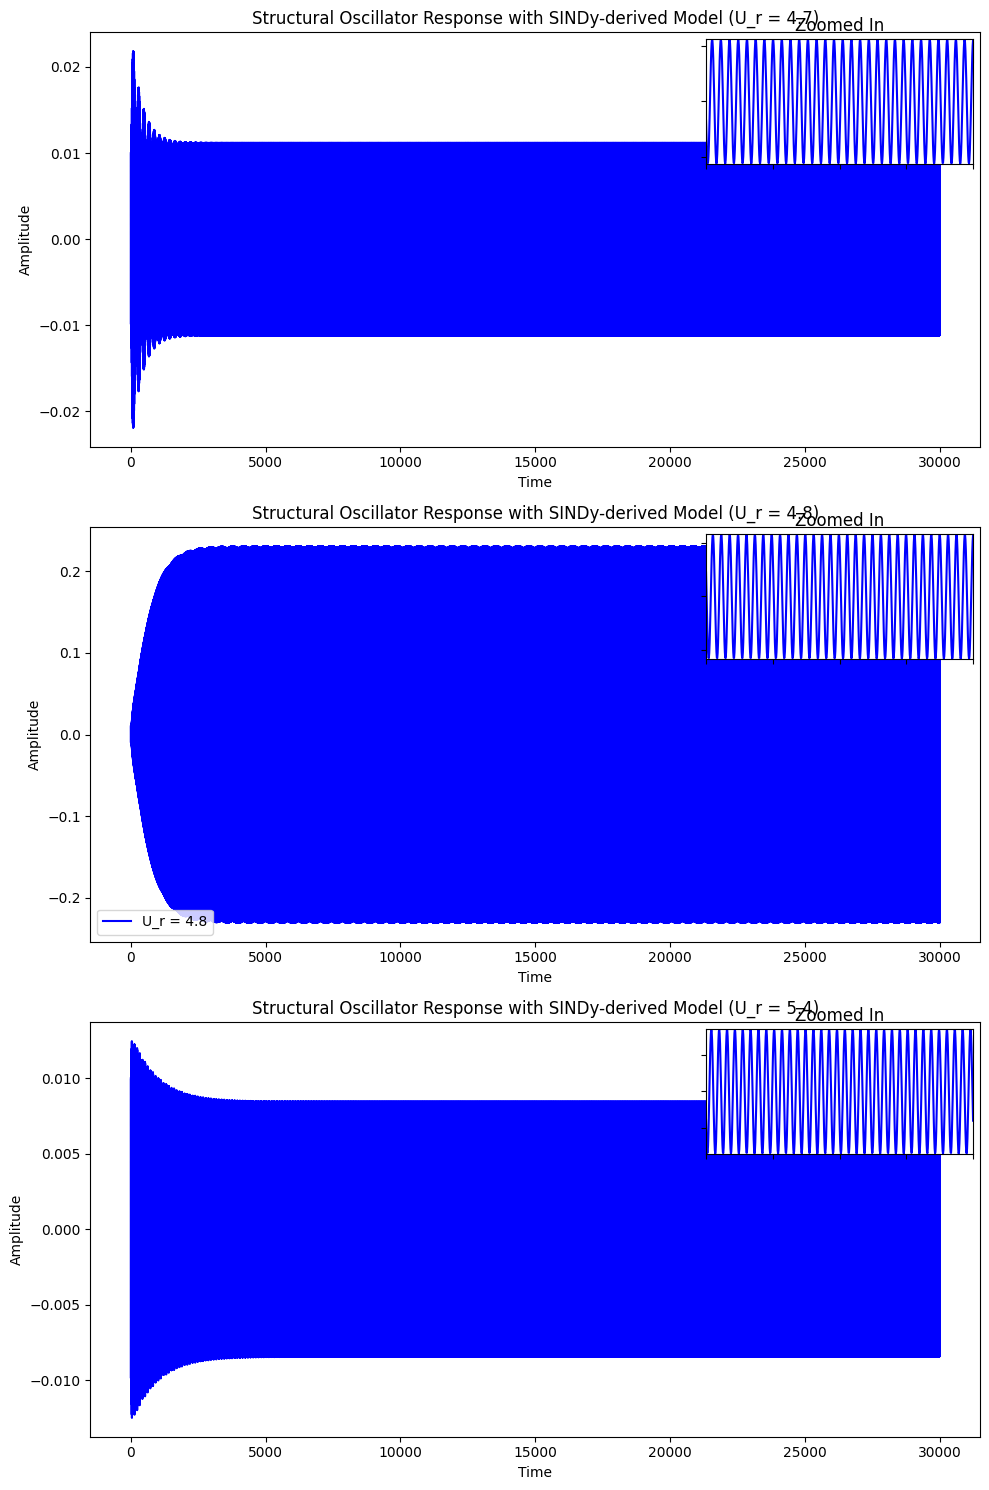

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Constants
epsilon = 0.05
St = 0.1932
A = 4
gamma = 0.8
alpha = 0
Cl_knot = 0.3842
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)

def structural_ode(state, t, M, St, U_r, zeta, gamma, mu, alpha):
    y, v, q, u = state

    dy_dt = v
    dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3

    dq_dt = (-0.011 + -0.206 * q + 1.025 * u + 0.008 * U_r +
            0.082 * q * U_r + -0.013 * u * U_r + -0.002 * U_r**2 +
            0.002 * q**3 + 0.007 * q**2 * u + -0.009 * q * u**2 +
            -0.008 * q * U_r**2 + 0.001 * u * U_r**2)

    du_dt = A * dv_dt + (-0.024 + 2.845 * q + -4.848 * u + 0.016 * U_r +
            -1.223 * q * U_r + 2.059 * u * U_r + -0.003 * U_r**2 +
            0.010 * q**3 + -0.162 * q**2 * u + -0.060 * q * u**2 +
            0.090 * q * U_r**2 + 0.026 * u * u * u + -0.209 * u * U_r**2)

    return [dy_dt, dv_dt, dq_dt, du_dt]

# Initial state and time points
initial_state = [0, 0.01, 0, 0.0]
t_points = np.linspace(0, 30000, 100000)

# Values of U_r to simulate
U_r_values = [4.7, 4.8, 5.4]

# Plotting setup
plt.figure(figsize=(10, 15))


for i, U_r in enumerate(U_r_values):
    solution = odeint(structural_ode, initial_state, t_points, args=(M, St, U_r, zeta, gamma, mu, alpha))
    y_dot_t = solution[:, 1]

    ax = plt.subplot(3, 1, i+1)
    ax.plot(t_points, y_dot_t, label=f'U_r = {U_r}', color='blue')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.legend()
    ax.set_title(f'Structural Oscillator Response with SINDy-derived Model (U_r = {U_r})')


    inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper right')
    inset_ax.plot(t_points, y_dot_t, color='blue')
    inset_ax.set_xlim(29800, 30000)  # Set the zoom-in region here
    inset_ax.set_ylim(min(y_dot_t[-1000:]), max(y_dot_t[-1000:]))  # Adjust the y-limits for zoomed region
    inset_ax.set_xticklabels('')
    inset_ax.set_yticklabels('')
    inset_ax.set_title('Zoomed In')


plt.tight_layout()


plt.savefig('structural_oscillator_response_separate_plots_zoomed.png', dpi=300)
plt.show()


/tmp/ipykernel_107594/3349748288.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


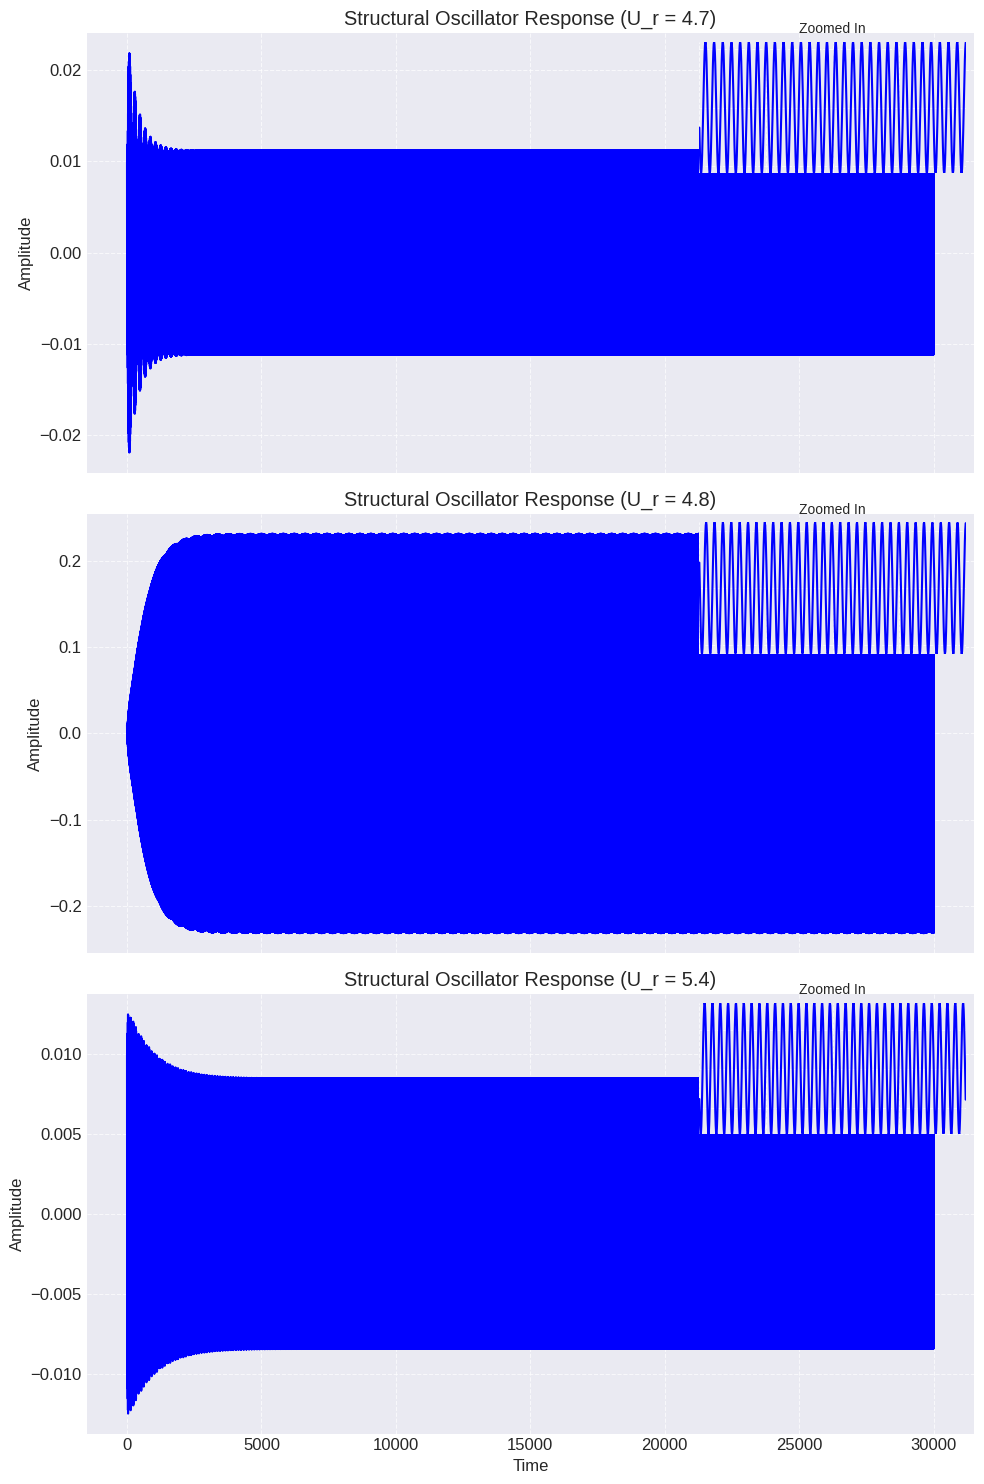

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Constants
epsilon = 0.05
St = 0.1932
A = 4
gamma = 0.8
alpha = 0
Cl_knot = 0.3842
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)

def structural_ode(state, t, M, St, U_r, zeta, gamma, mu, alpha):
    y, v, q, u = state

    dy_dt = v
    dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3

    dq_dt = (-0.011 + -0.206 * q + 1.025 * u + 0.008 * U_r +
            0.082 * q * U_r + -0.013 * u * U_r + -0.002 * U_r**2 +
            0.002 * q**3 + 0.007 * q**2 * u + -0.009 * q * u**2 +
            -0.008 * q * U_r**2 + 0.001 * u * U_r**2)

    du_dt = A * dv_dt + (-0.024 + 2.845 * q + -4.848 * u + 0.016 * U_r +
            -1.223 * q * U_r + 2.059 * u * U_r + -0.003 * U_r**2 +
            0.010 * q**3 + -0.162 * q**2 * u + -0.060 * q * u**2 +
            0.090 * q * U_r**2 + 0.026 * u**3 + -0.209 * u * U_r**2)

    return [dy_dt, dv_dt, dq_dt, du_dt]


initial_state = [0, 0.01, 0, 0.0]
t_points = np.linspace(0, 30000, 100000)


U_r_values = [4.7, 4.8, 5.4]


plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 12})


fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)


for i, U_r in enumerate(U_r_values):
    solution = odeint(structural_ode, initial_state, t_points, args=(M, St, U_r, zeta, gamma, mu, alpha))
    y_dot_t = solution[:, 1]  # Extracting the y_dot (velocity)

    ax = axs[i]
    ax.plot(t_points, y_dot_t, label=f'U_r = {U_r}', color='blue')
    ax.set_ylabel('Amplitude')
    ax.legend(loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(f'Structural Oscillator Response (U_r = {U_r})')


    inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper right')
    inset_ax.plot(t_points, y_dot_t, color='blue')
    inset_ax.set_xlim(29800, 30000)
    inset_ax.set_ylim(min(y_dot_t[-2000:]), max(y_dot_t[-2000:]))  # Adjust the y-limits for zoomed region
    inset_ax.set_xticklabels('')
    inset_ax.set_yticklabels('')
    inset_ax.grid(True, linestyle='--', alpha=0.7)
    inset_ax.set_title('Zoomed In', fontsize=10)


axs[-1].set_xlabel('Time')


plt.tight_layout()


plt.savefig('structural_oscillator_response_separate_plots_zoomed.png', dpi=300)
plt.show()


/tmp/ipykernel_107594/358357478.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


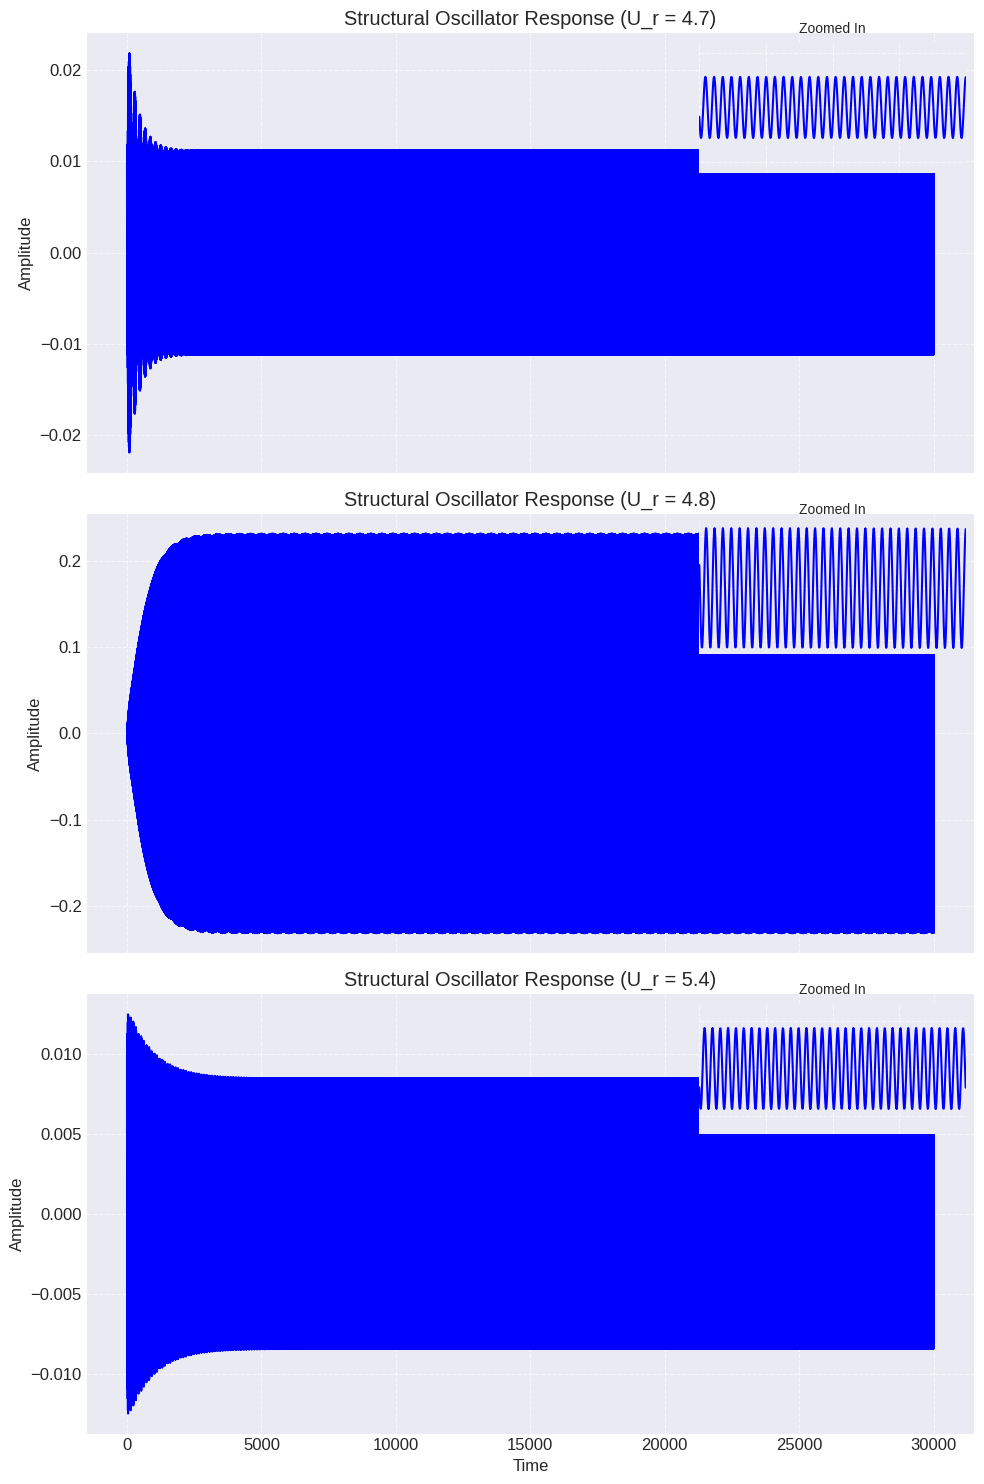

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Constants
epsilon = 0.05
St = 0.1932
A = 4
gamma = 0.8
alpha = 0
Cl_knot = 0.3842
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)

def structural_ode(state, t, M, St, U_r, zeta, gamma, mu, alpha):
    y, v, q, u = state

    dy_dt = v
    dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3

    dq_dt = (-0.011 + -0.206 * q + 1.025 * u + 0.008 * U_r +
            0.082 * q * U_r + -0.013 * u * U_r + -0.002 * U_r**2 +
            0.002 * q**3 + 0.007 * q**2 * u + -0.009 * q * u**2 +
            -0.008 * q * U_r**2 + 0.001 * u * U_r**2)

    du_dt = A * dv_dt + (-0.024 + 2.845 * q + -4.848 * u + 0.016 * U_r +
            -1.223 * q * U_r + 2.059 * u * U_r + -0.003 * U_r**2 +
            0.010 * q**3 + -0.162 * q**2 * u + -0.060 * q * u**2 +
            0.090 * q * U_r**2 + 0.026 * u**3 + -0.209 * u * U_r**2)

    return [dy_dt, dv_dt, dq_dt, du_dt]

# Initial state and time points
initial_state = [0, 0.01, 0, 0.0]
t_points = np.linspace(0, 30000, 100000)

# Values of U_r to simulate
U_r_values = [4.7, 4.8, 5.4]

# Apply a consistent style
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 12})

# Plotting setup
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Solve the ODE for each U_r and plot the results
for i, U_r in enumerate(U_r_values):
    solution = odeint(structural_ode, initial_state, t_points, args=(M, St, U_r, zeta, gamma, mu, alpha))
    y_dot_t = solution[:, 1]  # Extracting the y_dot (velocity)

    ax = axs[i]
    ax.plot(t_points, y_dot_t, label=f'U_r = {U_r}', color='blue')
    ax.set_ylabel('Amplitude')
    ax.legend(loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(f'Structural Oscillator Response (U_r = {U_r})')

    # Add a zoomed-in view
    inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper right')
    inset_ax.plot(t_points, y_dot_t, color='blue')
    inset_ax.set_xlim(29800, 30000)  # Set the zoom-in region here
    inset_ax.set_xticklabels('')
    inset_ax.set_yticklabels('')
    inset_ax.grid(True, linestyle='--', alpha=0.7)
    inset_ax.set_title('Zoomed In', fontsize=10)

# Shared x-axis label
axs[-1].set_xlabel('Time')

# Plot customization
plt.tight_layout()

# Save the plot to fit on an A4 sheet
plt.savefig('structural_oscillator_response_separate_plots_zoomed.png', dpi=300)
plt.show()


/tmp/ipykernel_107594/425373907.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


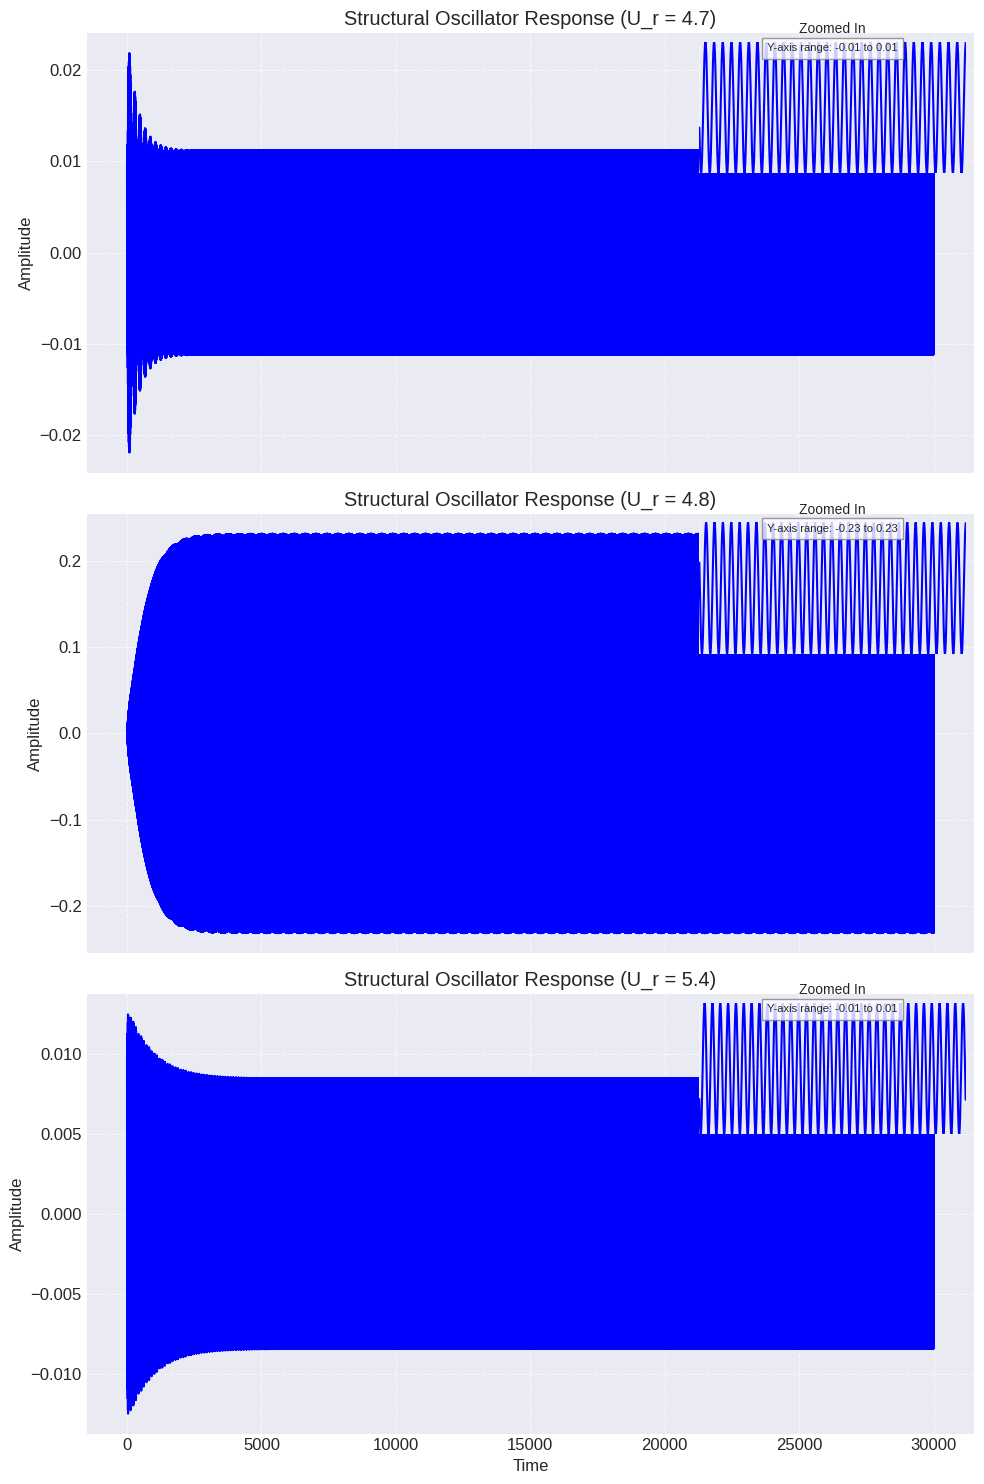

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Constants
epsilon = 0.05
St = 0.1932
A = 4
gamma = 0.8
alpha = 0
Cl_knot = 0.3842
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)

def structural_ode(state, t, M, St, U_r, zeta, gamma, mu, alpha):
    y, v, q, u = state

    dy_dt = v
    dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3

    dq_dt = (-0.011 + -0.206 * q + 1.025 * u + 0.008 * U_r +
            0.082 * q * U_r + -0.013 * u * U_r + -0.002 * U_r**2 +
            0.002 * q**3 + 0.007 * q**2 * u + -0.009 * q * u**2 +
            -0.008 * q * U_r**2 + 0.001 * u * U_r**2)

    du_dt = A * dv_dt + (-0.024 + 2.845 * q + -4.848 * u + 0.016 * U_r +
            -1.223 * q * U_r + 2.059 * u * U_r + -0.003 * U_r**2 +
            0.010 * q**3 + -0.162 * q**2 * u + -0.060 * q * u**2 +
            0.090 * q * U_r**2 + 0.026 * u**3 + -0.209 * u * U_r**2)

    return [dy_dt, dv_dt, dq_dt, du_dt]

# Initial state and time points
initial_state = [0, 0.01, 0, 0.0]
t_points = np.linspace(0, 30000, 100000)

# Values of U_r to simulate
U_r_values = [4.7, 4.8, 5.4]

# Apply a consistent style
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 12})

# Plotting setup
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Solve the ODE for each U_r and plot the results
for i, U_r in enumerate(U_r_values):
    solution = odeint(structural_ode, initial_state, t_points, args=(M, St, U_r, zeta, gamma, mu, alpha))
    y_dot_t = solution[:, 1]  # Extracting the y_dot (velocity)

    ax = axs[i]
    ax.plot(t_points, y_dot_t, label=f'U_r = {U_r}', color='blue')
    ax.set_ylabel('Amplitude')
    ax.legend(loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(f'Structural Oscillator Response (U_r = {U_r})')

    # Add a zoomed-in view
    inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper right')
    inset_ax.plot(t_points, y_dot_t, color='blue')
    inset_ax.set_xlim(29800, 30000)  # Set the zoom-in region here
    inset_ax.set_ylim(min(y_dot_t[-2000:]), max(y_dot_t[-2000:]))  # Adjust the y-limits for zoomed region
    inset_ax.set_xticklabels('')
    inset_ax.set_yticklabels('')
    inset_ax.grid(True, linestyle='--', alpha=0.7)
    inset_ax.set_title('Zoomed In', fontsize=10)

    # Annotate zoomed-in plot with y-axis range
    ymin, ymax = inset_ax.get_ylim()
    inset_ax.annotate(f'Y-axis range: {ymin:.2f} to {ymax:.2f}', xy=(0.5, 0.95), xycoords='axes fraction',
                      ha='center', va='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))

# Shared x-axis label
axs[-1].set_xlabel('Time')

# Plot customization
plt.tight_layout()

# Save the plot to fit on an A4 sheet
plt.savefig('structural_oscillator_response_separate_plots_zoomed.png', dpi=300)
plt.show()
